<a href="https://colab.research.google.com/github/DawidK4/MyNotebooks/blob/main/StatisticsNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'
housing = pd.read_csv(path + 'Housing.csv', header='infer')

Mounted at /content/drive


In [ ]:
housing.head()
housing['median_house_value'].max()

500001.0

# Key concepts related to data types

1. **Numerical**
* Continuous - Data that can take any value within a range. (e.g., temperature, height)
* Discrete - Data that can only take specific, separate values, often integers. (e.g., number of students, count of items)

2. **Categorical**
* Binary - A special case of categorical data with only two possible values. (e.g., 0/1, true/false, yes/no)
* Ordinal - Categorical data with an inherent order or ranking. (e.g., education levels, customer satisfaction ratings)



# Key concepts related to measures of dispersion
1. **Deviation** - The difference between an observed value and an estimated location (usually the mean).
2. Variance - The sum of squared deviations from the mean divided by n-1, where n is the number of values in the data set. It measures the average squared dispersion around the mean.
3. **Standard Deviation** - The square root of the variance. It represents a typical or average deviation from the mean in the original units of the data.
4. **Mean Absolute Deviation (MAD)** - The average of the absolute deviations of a data set from its mean. It provides a measure of dispersion that is less sensitive to outliers than the standard deviation.
5. **Median Absolute Deviation (MAD)** - The median of the absolute deviations of a data set from its median. Like the MAD from the mean, it is robust to outliers.
6. **Range** - The difference between the smallest and largest values in a data set. It gives a basic idea of the spread of the data but is sensitive to extreme values.
7. **Order Statistics** - Measures based on values for data sorted in ascending order. Examples include percentiles and quartiles.
8. **Percentile** - A value such that P percent of the values are equal to or less than it, and (100-P) percent are equal to or greater than it. For example, the 25th percentile is the value below which 25% of the data falls.
9. **Interquartile Range (IQR)** - The difference between the 75th percentile (Q3) and the 25th percentile (Q1). It represents the spread of the middle 50% of the data and is less affected by outliers than the range.

# Boxplot
of median_income

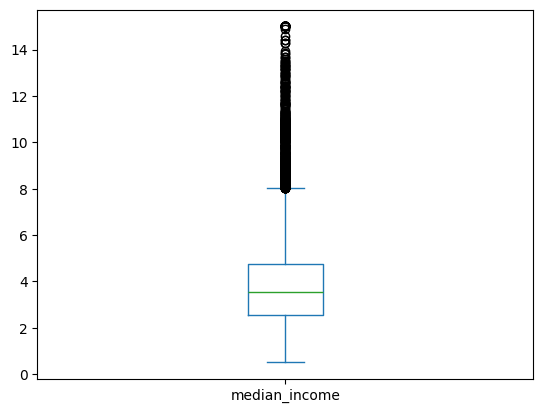

In [ ]:
ax = housing['median_income'].plot.box()

# Histogram
of housing_median_age

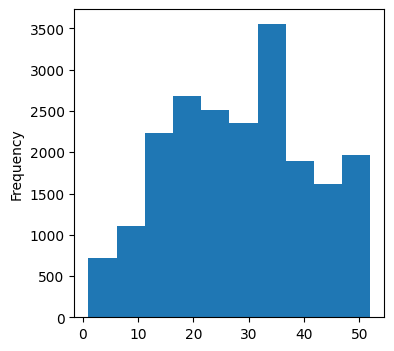

In [ ]:
ax = housing['housing_median_age'].plot.hist(figsize=(4, 4))

# Density chart
of median_house_value

It has to be noted that density chart presents proportions instead of quantity (like histogram).

Text(0.5, 0, 'Median house value')

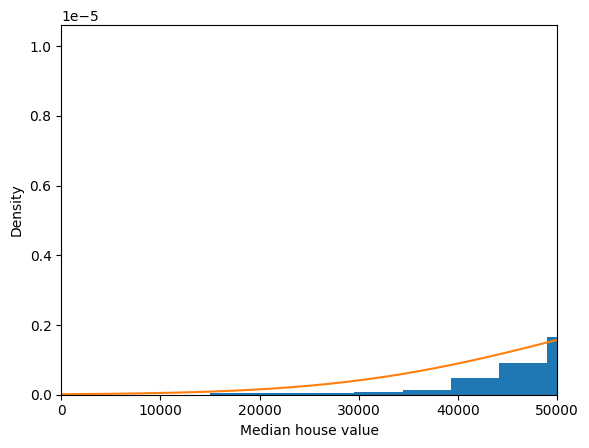

In [ ]:
ax = housing['median_house_value'].plot.hist(density=True, xlim=[0, 50000], bins=100)
housing['median_house_value'].plot.density(ax=ax)
ax.set_xlabel('Median house value')

# Exploring binary and categorized data
* **Mode** - the value that occurs most often in the data set
* **Expected value** - if a category can be assigned to numerical values, it will be the average of the values ​​based on the probability of occurrence of a given category



# Barchart


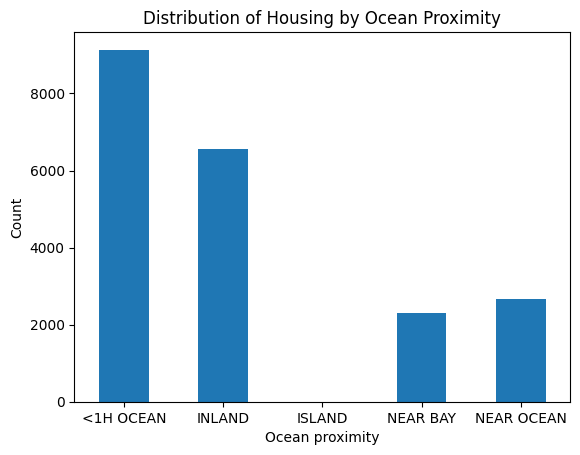

In [ ]:
ocean_proximity_counts = housing.groupby('ocean_proximity')['ocean_proximity'].count()
ax = ocean_proximity_counts.plot.bar(rot=0) # rot=0 to keep x-axis labels horizontal

ax.set_xlabel('Ocean proximity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Housing by Ocean Proximity')

plt.show()

# Pie chart

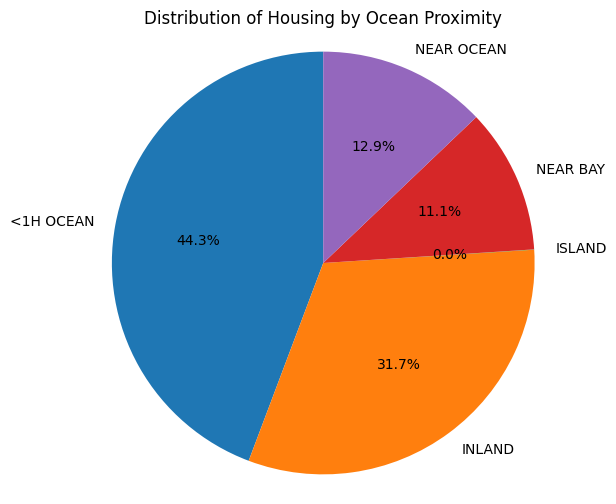

In [ ]:
proportions = ocean_proximity_counts / ocean_proximity_counts.sum()

plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Housing by Ocean Proximity')
plt.axis('equal')
plt.show()

# Correlation matrix
<-1, 1>


In [ ]:
# Discrete values have to be converted to the numerical ones or be dropped
housing['ocean_proximity_num'] = housing['ocean_proximity'].replace({'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5})
housing = housing.drop('ocean_proximity', axis=1)
housing.corr()

<ipython-input-19-7281e7700425>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['ocean_proximity_num'] = housing['ocean_proximity'].replace({'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5})


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_num
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity_num,-0.439870,0.390957,0.145163,-0.016309,-0.021466,-0.083537,-0.027144,-0.039673,0.021732,1.000000


# Scatter plot

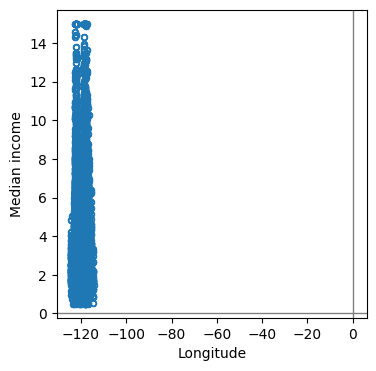

In [ ]:
ax = housing.plot.scatter(x='longitude', y='median_income', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Median income')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)